In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df_sales = pd.read_csv('../Data/SalesData.csv', delimiter=',', header='infer', encoding='latin-1')

In [3]:
df_sales.head(5)

,Date,Month,Quarter,Year,Qty,Product,Category,Pharmacy,Location
0,1-11-2015,11,4,2015,2,Injection 14,Skinbooster,Pharmacy 1,London
1,1-11-2015,11,4,2015,1,Injection 14,Skinbooster,Pharmacy 1,London
2,1-11-2015,11,4,2015,1,Injection 1,Dermafiller,Pharmacy 2,Outside London M25
3,1-11-2015,11,4,2015,1,Injection 2,Dermafiller,Pharmacy 2,Outside London M25
4,1-11-2015,11,4,2015,4,Injection 14,Skinbooster,Pharmacy 2,"NorthEast, Midlands"


Text(0.5, 1.0, 'Location Count')

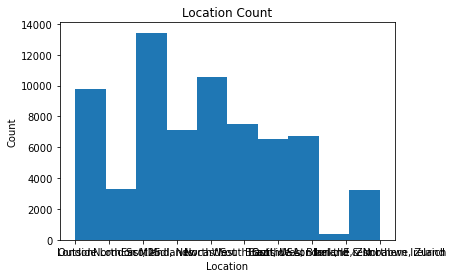

In [4]:
plt.hist(df_sales.Location)
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Location Count")

In [ ]:
features = ['Year', 'Product', 'Location', 'Month', 'Quarter', 'Category']

fig, ax = plt.subplots(len(features), 1, figsize = (10, 50))

for i in range(0, len(features)):
#for idx, col in enumerate(features, 0):
    ax[i].plot(df_sales['Qty'], df_sales[features[i]], 'o')
    ax[i].set_xlabel('Qty')
    ax[i].set_ylabel(features[i])
    ax[i].set_title(features[i])

plt.show()

In [ ]:
import statsmodels.formula.api as smf

features = ['Year', 'Product', 'Location', 'Month', 'Quarter', 'Category']

fig, ax = plt.subplots(len(features), 1, figsize=(15, 50))

for i in range(0, len(features)):
    model = smf.ols('Qty~'+features[i], df_sales).fit()
    print('The r^2 of {} is {:.2f}'.format(features[i], model.rsquared))
    ax[i].scatter(df_sales[features[i]], df_sales.Qty, label='data')
    ax[i].plot(df_sales[features[i]], model.fittedvalues, color='red', label='OLS')
    ax[i].legend()
    ax[i].set_title('Regression Qty~ '+features[i])

In [ ]:
df_sales.dtypes

In [ ]:
df_sales.Year.unique()

In [ ]:
df_sales.Year = df_sales.Year.astype(float)

In [ ]:
df_sales.Month.unique()
df_sales.Month = df_sales.Month.astype(float)

In [ ]:
df_sales.dtypes

In [ ]:
formula = "Qty~Year+Product+Location+Month+Quarter+Category"
model = smf.ols(formula, df_sales).fit()
print(model.rsquared_adj)

In [ ]:
model.summary()